In [1]:
#Corinne Komlodi
#Worked with:
#Time Taken:

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import scipy.signal as signal

In [43]:
print('1)')
rvPrecision = 50 #cm/s
a = np.array([.1,1,10]) #* 1.496e13 #cm
P = np.sqrt(a**3) #* 3.156e7 #s
G = 6.6743e-8 #cm3 g-1 s-2
Mstar = 1.9884e33 #g
Msun = Mstar
Mearth = 5.9722e27 #g

minMass = (rvPrecision/8.9)*((Mstar/Msun)**(-2/3))*((1/P)**(-1/3)) #earth masses
print(P)
print('{0:.4f}*sin(i) for .1 AU'.format(minMass[0]))
print('{0:.4f}*sin(i) for 1 AU'.format(minMass[1]))
print('{0:.4f}*sin(i) for 10 AU'.format(minMass[2]))

1)
[ 0.03162278  1.         31.6227766 ]
1.7766*sin(i) for .1 AU
5.6180*sin(i) for 1 AU
17.7656*sin(i) for 10 AU


In [61]:
print('2)')
alpha = 2e-5 #arcsec
a = 1 #au
d = 50 #pc

minMas = (alpha*(Msun)*(50))/Mearth

print('{0:.4f}'.format(minMas))

2)
332.9426


In [102]:
print('3)')
print('a.')
print('P^-1 where the N is the transit frequency and frequency is one over the period')
print('b.')
print("Vp = 2pi*a/P where a = P^2/3 which can be rearranged to yield vp = -1/3. since Ttransit is prop to 1/vp")
print("Ttransit is prop to P^(1/3)")
k = 15/(365**(-1/3))
P = np.array([100,500])
Rp = k*np.sqrt(15/P**(-1/3))

print('c.')
print('100 days: {0:.4f}'.format(2*Rp[0]))
print('500 days: {0:.4f}'.format(2*Rp[1]))

3)
a.
P^-1 where the N is the transit frequency and frequency is one over the period
b.
Vp = 2pi*a/P where a = P^2/3 which can be rearranged to yield vp = -1/3. since Ttransit is prop to 1/vp
Ttransit is prop to P^(1/3)
c.
100 days: 191772.6721
500 days: 250773.5456


4)
a.
systematic Vel = 37.4234 km/s
b.
0.0008901243935659403


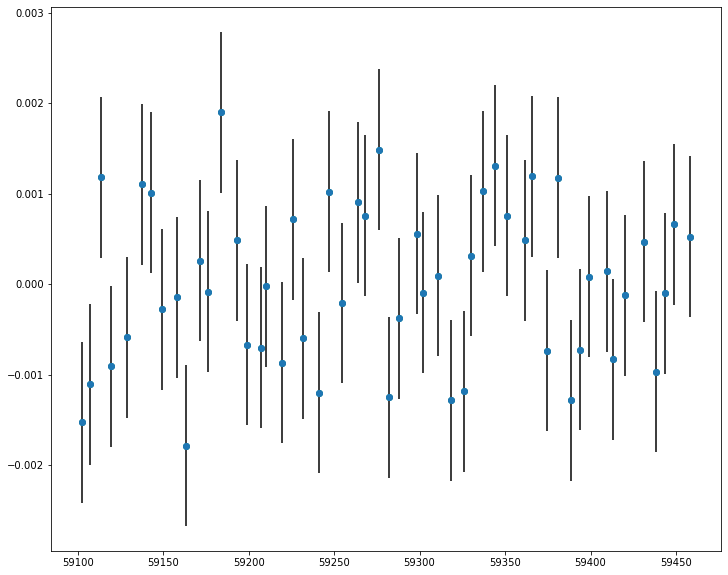

In [136]:
print('4)')
data = pd.read_csv('/Users/corinnekomlodi/Desktop/RV.csv')
df = pd.DataFrame(data, columns = ['MJD','RV','sigma'])
MJD, RV, sigma = np.array(df['MJD']), np.array(df['RV']), np.array(df['sigma'])

systV = (1/len(MJD))*np.sum(RV) #km/s
print('a.')
print('systematic Vel = {0:.4f} km/s'.format(systV))
print('b.')
yerr = np.sqrt(np.sum((RV-systV)**2)/len(RV))
fig, ax = plt.subplots(1,1,figsize = (12,10))
ax.plot(MJD, RV-systV,'o', color = 'teal')
ax.errorbar(MJD, RV-systV, yerr = yerr, fmt='o', ecolor = 'k')

print(yerr)

In [ ]:
#Chi^2 and RedChi^2

[2.59]


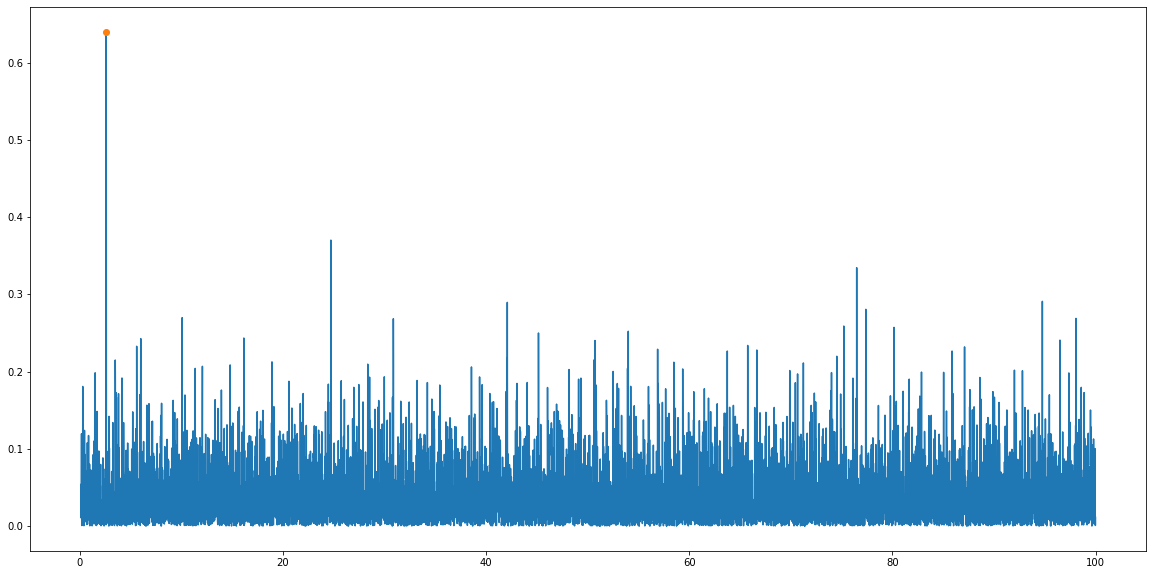

In [163]:
sampletimes = MJD
measurementvalues = RV-systV
frequency = np.arange(.1, 100, .01) #log space?
frequency2 = np.logspace(.1,100)
normalize = True
LS = signal.lombscargle(sampletimes, measurementvalues, frequency, normalize = normalize)
x = np.where(LS == max(LS))
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(frequency, LS)
ax.plot(frequency[x], LS[x], 'o')
print(frequency[x])
#ax.set_xscale('log')